* 레이블링

In [1]:
import cv2
import numpy as np

In [233]:
src = cv2.imread('./data/circles.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

ret, bgray = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
ret, labels = cv2.connectedComponents(bgray)

dst = np.zeros(src.shape, dtype=src.dtype)

for i in range(1, ret):
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)

    dst[labels == i] = [b, g, r]

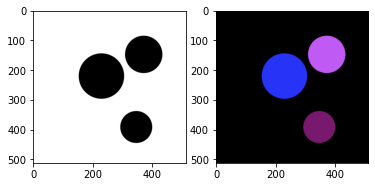

In [234]:
fig = plt.figure()
plt.subplot(121)
plt.imshow(src)
plt.subplot(122)
plt.imshow(dst)

In [8]:
ret # 객체 수(배경 포함)

4

In [9]:
np.unique(labels)

array([0, 1, 2, 3], dtype=int32)

In [235]:
src = cv2.imread('./data/circles.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

ret, bgray = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(bgray)

dst = np.zeros(src.shape, dtype=src.dtype)

for i in range(1, ret): # 배경빼고 객체부터
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)

    dst[labels == i] = [b, g, r]

for i in range(1, ret):
    x, y, width, height, area = stats[i]
    
    cv2.rectangle(dst, (x, y, width, height), (255, 0, 0), 2)
    # cv2.rectangle(dst, (x, y), (x+width, y+height), (255, 0, 0), 2)
    
    cx, cy = centroids[i]
    cv2.circle(dst, (int(cx), int(cy)), 5, (0, 0, 255), -1)

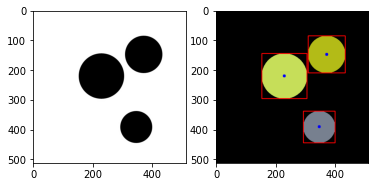

In [236]:
fig = plt.figure()
plt.subplot(121)
plt.imshow(src)
plt.subplot(122)
plt.imshow(dst)

In [21]:
stats

array([[     0,      0,    512,    512, 222719],
       [   308,     86,    125,    125,  12281],
       [   153,    145,    152,    152,  18152],
       [   292,    338,    107,    107,   8992]], dtype=int32)

In [22]:
centroids

array([[247.77339607, 258.80937863],
       [370.        , 148.        ],
       [228.5       , 220.50534376],
       [345.00077847, 390.99477313]])

In [237]:
src = cv2.imread('./data/keyboard.bmp', cv2.IMREAD_GRAYSCALE)

ret, bgray = cv2.threshold(src, 128, 255, cv2.THRESH_BINARY)
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(bgray)

dst = src.copy()
for i in range(1, ret):
    x, y, width, height, area = stats[i]
    cv2.rectangle(dst, (x, y, width, height), (255, 0, 0), 2)

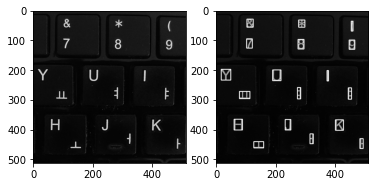

In [239]:
fig = plt.figure()
plt.subplot(121)
plt.imshow(src, cmap='gray')
plt.subplot(122)
plt.imshow(dst, cmap='gray')

* 외곽선 검출

In [241]:
src = np.zeros(shape=(512,512,3), dtype=np.uint8)
cv2.rectangle(src, (50, 100), (450, 400), (255, 255, 255), -1)
cv2.rectangle(src, (100, 150), (400, 350), (0, 0, 0), -1)
cv2.rectangle(src, (200, 200), (300, 300), (255, 255, 255), -1)

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

mode = cv2.RETR_LIST
method = cv2.CHAIN_APPROX_SIMPLE

contours, hierarchy = cv2.findContours(gray, mode, method)

for contour in contours:
    cv2.drawContours(src, [contour], 0, (0, 0, 255), 3)

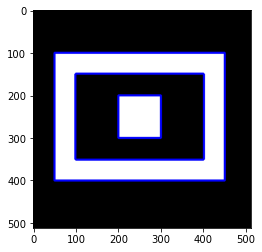

In [242]:
plt.imshow(src)

In [244]:
src = cv2.imread('./data/contours.bmp')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

mode = cv2.RETR_TREE
method = cv2.CHAIN_APPROX_SIMPLE

contours, hierarchy = cv2.findContours(gray, mode, method)

for contour in contours:
    cv2.drawContours(src, [contour], 0, (0, 0, 255), 3)

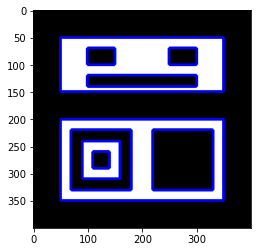

In [245]:
plt.imshow(src)

## 객체 검출

* 템플릿 매칭

In [246]:
src = cv2.imread('./data/alphabet.bmp', cv2.IMREAD_GRAYSCALE)

# template = cv2.imread('./data/S.bmp', cv2.IMREAD_GRAYSCALE)
# template = cv2.imread('./data/b.bmp', cv2.IMREAD_GRAYSCALE)
template = cv2.imread('./data/A.bmp', cv2.IMREAD_GRAYSCALE)

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

r = cv2.matchTemplate(src, template, cv2.TM_CCOEFF_NORMED)   # maxLoc로 사용
# r = cv2.matchTemplate(src, template, cv2.TM_CCORR_NORMED)  # maxLoc로 사용
# r = cv2.matchTemplate(src, template, cv2.TM_SQDIFF_NORMED) # minLoc로 사용

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(r)

w, h = template.shape

cv2.rectangle(dst, maxLoc, (maxLoc[0]+h, maxLoc[1]+w), (0, 0, 255), 2)
# cv2.rectangle(dst, minLoc, (minLoc[0]+h, minLoc[1]+w), (0, 0, 255), 2)

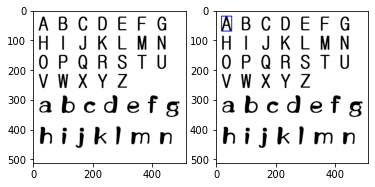

In [248]:
fig = plt.figure()
plt.subplot(121)
plt.imshow(src, cmap='gray')
plt.subplot(122)
plt.imshow(dst)

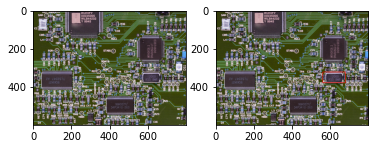

In [253]:
src = cv2.imread('./data/circuit.bmp')

template = cv2.imread('./data/crystal.bmp')

dst = src.copy()

r = cv2.matchTemplate(src, template, cv2.TM_CCOEFF_NORMED) 
# r = cv2.matchTemplate(src, template, cv2.TM_CCORR_NORMED) 
# r = cv2.matchTemplate(src, template, cv2.TM_SQDIFF_NORMED) 

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(r)

w, h, _ = template.shape

cv2.rectangle(dst, maxLoc, (maxLoc[0]+h, maxLoc[1]+w), (255, 0, 0), 2)
# cv2.rectangle(dst, minLoc, (minLoc[0]+h, minLoc[1]+w), (0, 0, 255), 2)

fig = plt.figure()
plt.subplot(121)
plt.imshow(src, cmap='gray')
plt.subplot(122)
plt.imshow(dst)

* 캐스케이드 분류기와 얼굴 검출

* 절대경로로 써주기(너무 길면 파일 디렉토리에 복사해놓고 쓰기)

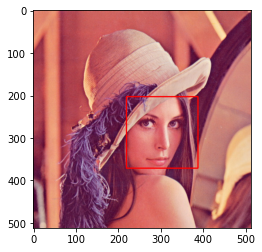

In [260]:
image = cv2.imread('./data/lena.jpg')

face_cascade = cv2.CascadeClassifier("C:/Users/Playdata/anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml")
# face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml") 
faces = face_cascade.detectMultiScale(image)

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y, w, h), (0, 0, 255), 2)

img = cv2.merge([image[:, :, 2], image[:,:, 1], image[:,:, 0]])
plt.imshow(img)

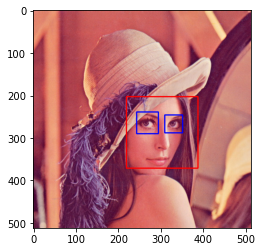

In [261]:
image = cv2.imread('./data/lena.jpg')

face_cascade = cv2.CascadeClassifier("C:/Users/Playdata/anaconda3/Lib/site-packages/cv2/data/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("C:/Users/Playdata/anaconda3/Lib/site-packages/cv2/data/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(image, 1.1, 2) # default: (이미지, 검색 윈도우 확대비율(1.1), 최소 검출 횟수(3)) 
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y, w, h), (0, 0, 255), 2)
    
    faceROI = image[y:y+h , x:x+w]
    eyes = eye_cascade.detectMultiScale(faceROI)
    
    for (x2, y2, w2, h2) in eyes:
        cv2.rectangle(faceROI, (x2, y2, w2, h2), (255, 0, 0), 2)

        
img = cv2.merge([image[:, :, 2], image[:,:, 1], image[:,:, 0]])
plt.imshow(img)

* HOG 알고리즘과 보행자 검출

In [172]:
import matplotlib.pyplot as plt

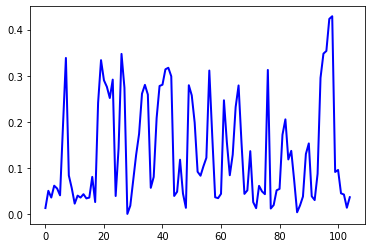

In [262]:
src = cv2.imread('./data/people1.png')

hog = cv2.HOGDescriptor()

dst = hog.compute(src)

plt.plot(dst[::36], color='b', linewidth='2') # 한 블록별 분포도

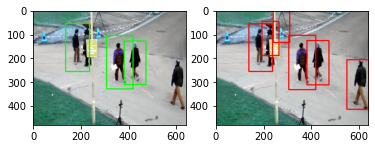

In [263]:
src = cv2.imread('./data/people.png')

hog = cv2.HOGDescriptor()

people_detect = cv2.HOGDescriptor_getDefaultPeopleDetector()

hog.setSVMDetector(people_detect)

loc, weight = hog.detect(src) # 아무것도 검출되지 않음

loc2, weight2 = hog.detectMultiScale(src)

loc3, weight3 = hog.detectMultiScale(src, winStride=(1, 1), padding=(8, 8))

dst = src.copy()
for rect in loc2:
    cv2.rectangle(dst, rect, (0, 255, 0), 3)

dst2 = src.copy()
for rect2 in loc3:
    cv2.rectangle(dst2, rect2, (255, 0, 0), 3)
    
fig = plt.figure()
plt.subplot(121)
plt.imshow(dst)
plt.subplot(122)
plt.imshow(dst2)

In [265]:
from skimage.feature import hog
import matplotlib.image as mpimg

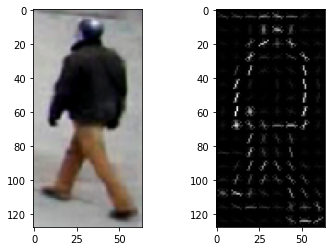

In [266]:
src = cv2.imread('./data/people1.png')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

hog_feature, hog_image = hog(gray, orientations=9, pixels_per_cell=(8, 8), 
                            cells_per_block=(2, 2), block_norm='L2-Hys', transform_sqrt=False,
                            visualize=True, feature_vector=False) # feature_vector= true하면 구조 안나오고 한줄로 3750,1 나옴

fig = plt.figure()
plt.subplot(121)
plt.imshow(src)
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')